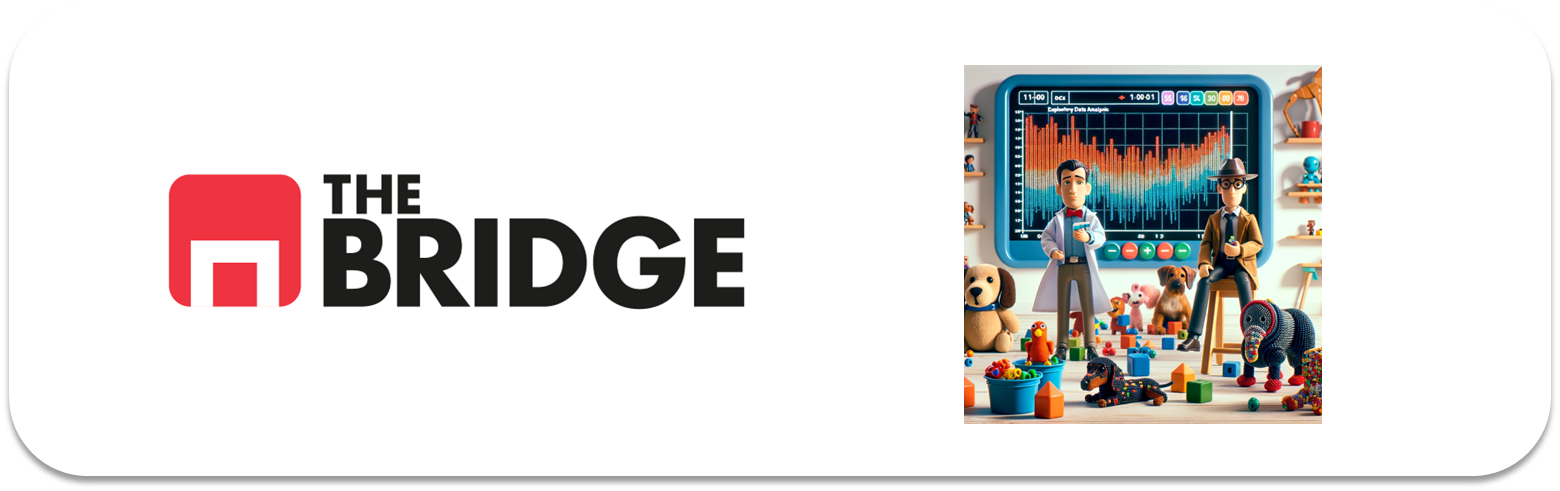

# PRACTICA OBLIGATORIA
## **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo.
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso.

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [9]:
import numpy as np
import pandas as pd
import scipy
import os

pd.options.mode.copy_on_write = True

*https://blog.minitab.com/es/blog/que-son-los-grados-de-libertad-en-estadistica*


## Titanic

### #2.1

Carga en un dataframe el dataset del titanic, que está en la ruta `./data/titanic.csv`.

In [10]:
path = "./sprint_07/multivariante/data/titanic.csv"
print("Current working directory:", os.getcwd())
print("Files inside:", os.listdir())

Current working directory: /home/p0lybius/Code/dataScience/theBridge/ONLINE_DS_THEBRIDGE_AAC
Files inside: ['Team-Challenge-T01', '18_Practica_Obligatoria_ETL.ipynb', '18_Practica_Obligatoria_Markdown.ipynb', 'sprint_02', '.gitignore', '.git', 'img', 'sprint_01', 'sprint_03', 'Team-Challenge-02', '18_Practica_Obligatoria_OOP.ipynb', 'sprint_08', 'README.md', 'sprint_05', 'sprint_07', '.ipynb_checkpoints', '18_Practica_Obligatoria_Python_I.ipynb', 'sprint_06', 'sprint_04', '18_Practica_Obligatoria_Colecciones_Funciones.ipynb']


In [11]:
df_titanic = pd.read_csv(path)
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #2.2

Deshazte de las columnas `deck`, `survived`, `pclass` y `embarked` porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis.

In [12]:
to_delete = ["deck", "survived", "pclass", "embarked"]
df_titanic.drop(columns=to_delete, inplace=True)

### #2.3

Suma las columnas `parch` y `sibsp`  para tener el número de parientes de cada pasajero, guarda el resultado en otra columna `family_members`, luego deshazte de `parch` y `sibsp`.

In [13]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic.sample(2)

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
66,female,29.0,0,0,10.50,Second,woman,False,Southampton,yes,True,0
614,male,35.0,0,0,8.05,Third,man,True,Southampton,no,True,0


In [14]:
df_titanic.drop(columns=["parch", "sibsp"], inplace=True)

### #2.4

Imputa la moda a los valores nulos de `embark_town`.

In [15]:
mode = df_titanic["embark_town"].mode()[0]
print("La moda de EMBARK_TOWN es", mode)

La moda de EMBARK_TOWN es Southampton


In [16]:
is_nan = df_titanic["embark_town"].isna()
imputations = df_titanic.loc[is_nan, "embark_town"].apply(lambda x: mode)

df_titanic.fillna(value={"embark_town": imputations}, inplace=True)
df_titanic.sample(5)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
75,male,25.00,7.6500,Third,man,True,Southampton,no,True,0
273,male,37.00,29.7000,First,man,True,Cherbourg,no,False,1
384,male,NaN,7.8958,Third,man,True,Southampton,no,True,0
471,male,38.00,8.6625,Third,man,True,Southampton,no,True,0
755,male,0.67,14.5000,Second,child,False,Southampton,yes,False,2


### #2.5

Imputa la media a los valores faltantes de `age`, si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna `who`).

In [17]:
median = df_titanic.groupby("who")["age"].median()

print("La mediana de AGE según WHO es:")
for i, k in enumerate(median):
	print(f"\t{median.index[i].upper()}: {k} años")

La mediana de AGE según WHO es:
	CHILD: 5.0 años
	MAN: 30.0 años
	WOMAN: 30.0 años


In [18]:
is_woman = df_titanic["who"] == "woman"
age_is_nan = df_titanic["age"].isna()
mask = is_woman & age_is_nan

imputations = df_titanic.loc[mask, "age"].apply(lambda x: median["woman"])
df_titanic.fillna(value={"age": imputations}, inplace=True)
df_titanic.sample(2)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
223,male,NaN,7.8958,Third,man,True,Southampton,no,True,0
18,female,31.0,18.0000,Third,woman,False,Southampton,no,False,1


In [19]:
is_man = df_titanic["who"] == "man"
age_is_nan = df_titanic["age"].isna()
mask = is_man & age_is_nan

imputations = df_titanic.loc[mask, "age"].apply(lambda x: median["man"])
df_titanic.fillna(value={"age": imputations}, inplace=True)
df_titanic.sample(2)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
581,female,39.0,110.8833,First,woman,False,Cherbourg,yes,False,2
236,male,44.0,26.0000,Second,man,True,Southampton,no,False,1


In [20]:
df_titanic.isna().sum()

sex               0
age               0
fare              0
class             0
who               0
adult_male        0
embark_town       0
alive             0
alone             0
family_members    0
dtype: int64

### #2.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable `alive` para saber si *un pasajero sobrevivió o no*:

> 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic? ¿Y entre ser adulto o ser niño?
> 2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
> 3. ¿De qué ciudad sobrevivieron más personas? ¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
> 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
> 5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?
> 6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.
> 7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?
> 8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?


__1. En términos absolutos, *¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic? ¿Y entre ser adulto o ser niño?__

In [21]:
print("Valor más frecuente (moda):")
for column in ["alive", "who"]:
	print(f"\t- {column.upper()}:", df_titanic[column].mode()[0])

Valor más frecuente (moda):
	- ALIVE: no
	- WHO: man


**Reporte de sobrevivientes**

<Axes: title={'center': 'Reporte de Sobrevivientes'}, xlabel='Cant. Pasajeros'>

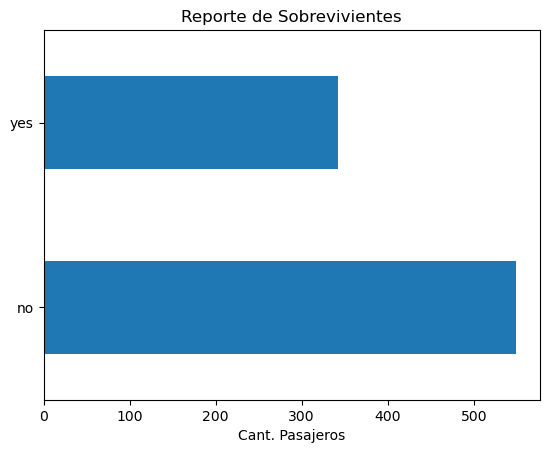

In [22]:
df_titanic.groupby(["alive"]).size().plot(kind="barh",
		title="Reporte de Sobrevivientes",
		xlabel="Cant. Pasajeros",
		ylabel="")

Como podemos observar, hay una mayor cantidad de fallecidos a la de sobrevivientes en la tragedia.

**Distribución de Tripulantes**

<Axes: title={'center': 'Distribución de Pasajeros'}, xlabel='Cant. de Pasajeros'>

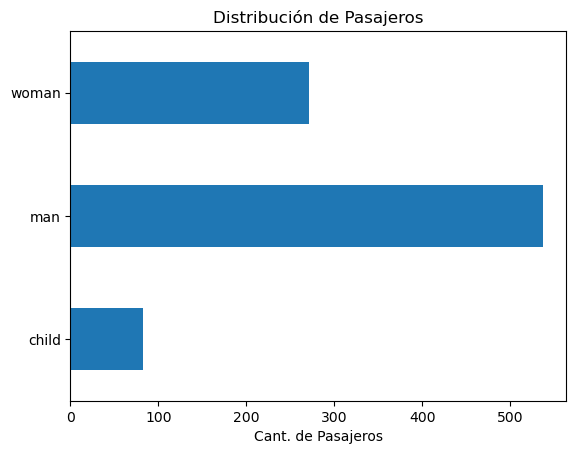

In [23]:
df_titanic.groupby(["who"]).size().plot(kind="barh",
		title="Distribución de Pasajeros",
		xlabel="Cant. de Pasajeros",
		ylabel="")

<Axes: title={'center': 'Distribución de Pasajeros'}, xlabel='Cant. de Pasajeros'>

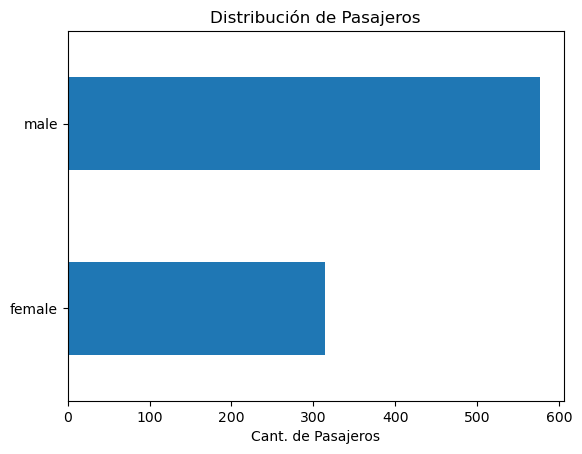

In [24]:
df_titanic.groupby(["sex"]).size().plot(kind="barh",
		title="Distribución de Pasajeros",
		xlabel="Cant. de Pasajeros",
		ylabel="")

Como se puede observar, existen muchos más hombre, adultos, en la tripulación.

> Nota:
> Cómo vimos anteriormente, la `mediana` se sitúa sobre los 30 años de edad para los ***hombres*** al igual que para las ***mujeres***.

**Sobrevivientes**

In [25]:
ut = df_titanic.groupby(["who", "alive"]).size().unstack()
ut

alive,no,yes
who,,
child,34,49
man,449,88
woman,66,205


<Axes: title={'center': 'Tasa de Sobrevivientes del total'}, xlabel='Porcentaje'>

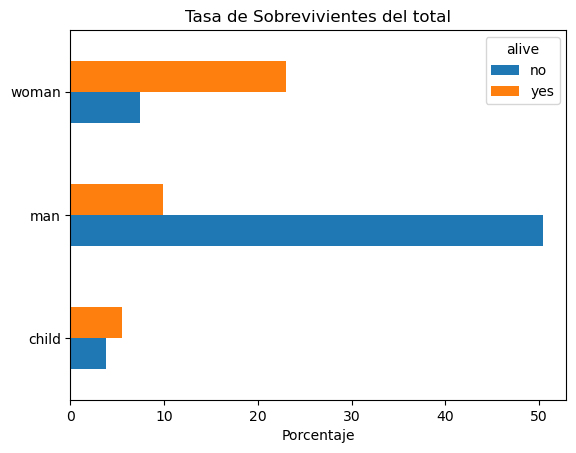

In [26]:
ut.apply(lambda x: x/len(df_titanic) * 100).plot(
		kind="barh",
		title="Tasa de Sobrevivientes del total",
		xlabel="Porcentaje",
		ylabel="")

Se puede observar que más del 50% de los hombres han fallecido en la tragedia.

Vamos a analizar a los niños que iban a bordo del Titanic.

In [27]:
mask = df_titanic["who"] == "child"
ut = df_titanic.loc[mask].groupby(["sex", "alive"]).size().unstack()
ut

alive,no,yes
sex,,
female,15,28
male,19,21


<Axes: title={'center': 'Niñas & Niñas: Tasa de Sobrevivientes según total'}, xlabel='Porcentaje'>

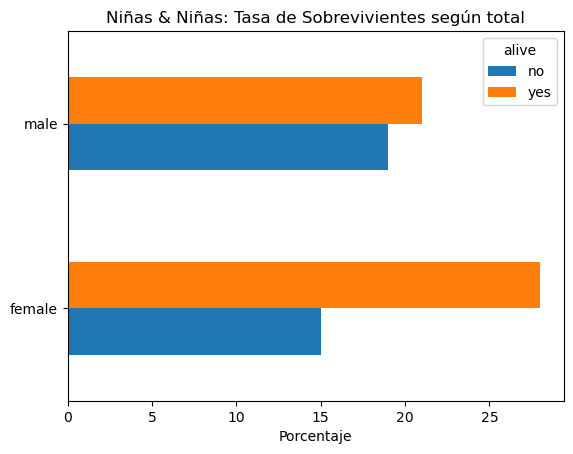

In [28]:
ut.plot(kind="barh",
		title="Niñas & Niñas: Tasa de Sobrevivientes según total",
		xlabel="Porcentaje",
		ylabel="")

Se puede observar que hay más niños varones que han fallecido en el Titanic aunque la diferencia es menor al 5% respecto de las niñas.

Para analizar la relación entre dos variables categoricas utilizamos el método de $\chi^2$.

**Prueba $\chi^2$ de Pearson**

In [29]:
contingency_table = pd.crosstab(df_titanic["alive"], df_titanic["who"])
print("Tabla de contingencia")
print("-"*30)
contingency_table

Tabla de contingencia
------------------------------


who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [30]:
result = scipy.stats.chi2_contingency(contingency_table)
print("Valor de Chi-Cuadrado:", result.statistic)
print("Valor de pvalue:", result.pvalue)
print("Grados de libertad:", result.dof)
print("Frecuencias esperadas:\n", result.expected_freq)

Valor de Chi-Cuadrado: 283.923050324233
Valor de pvalue: 2.2227620817798914e-62
Grados de libertad: 2
Frecuencias esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


> **Interpretación de la Prueba $\chi^2$**
>
> Nuestro valor de $p$ es de $2,2227620817798914\mathrm{e}{-62}$ y, asumiendo un nivel de significación $\alpha=0,05$ y $2$ *grados de libertad*, podemos decir que la relación entre las dos variables existe y es estádisticamente significactiva.

Como hemos visto anteriormente, para el grupo etario de menores de edad, se mantenía una tendencia de supervivencia para el sexo femenino, pero las diferencias no eran tan siderales.

Realizamos la **prueba de $\chi^2$ para dicho grupo etario**.

In [31]:
mask = df_titanic["who"] == "child"
contingency_table = pd.crosstab(df_titanic.loc[mask, "alive"],
								df_titanic.loc[mask, "sex"])
print("Tabla de contingencia")
print("-"*30)
contingency_table

Tabla de contingencia
------------------------------


sex,female,male
alive,,
no,15,19
yes,28,21


In [32]:
result = scipy.stats.chi2_contingency(contingency_table)
print("Valor de Chi-Cuadrado:", result.statistic)
print("Valor de pvalue:", result.pvalue)
print("Grados de libertad:", result.dof)
print("Frecuencias esperadas:\n", result.expected_freq)

Valor de Chi-Cuadrado: 0.8921315328456955
Valor de pvalue: 0.34490033570581025
Grados de libertad: 1
Frecuencias esperadas:
 [[17.61445783 16.38554217]
 [25.38554217 23.61445783]]


> **Interpretación de la Prueba $\chi^2$**
>
> Nuestro valor de $p$ es de $0.34490033570581025$ y, asumiendo el mismo *nivel de significación* y los mismos *grados de libertad*, podemos decir que la relación entre las dos variables no es existente en dicho grupo etario.

**2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?**

In [33]:
mask = df_titanic["alive"] == "no"
data = df_titanic.loc[mask].groupby(["class", "alive"]).size().unstack()
data.head()

alive,no
class,
First,80
Second,97
Third,372


<Axes: title={'center': 'Sobrevivientes según clase'}, xlabel='Cant. de Pasajeros'>

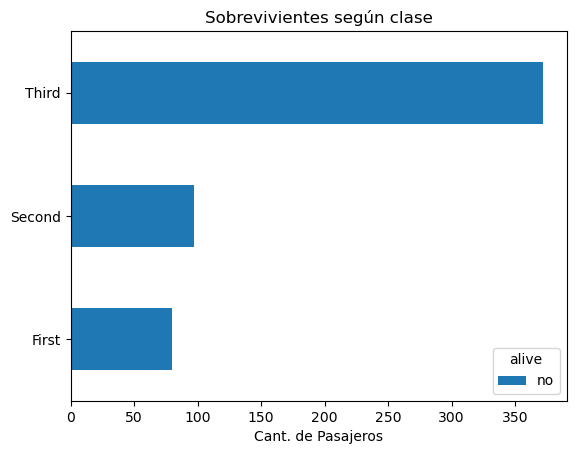

In [34]:
data.plot(kind="barh",
		  title="Sobrevivientes según clase",
		  xlabel="Cant. de Pasajeros",
		  ylabel="")

Según lo que se puede observar, en la tercer clase han fallecido más de 350 pasajeros, mientras que en segunda clase rozan los 100 pasajeros y en primera clase son 80 pasajeros.

<Axes: title={'center': 'Sobrevivientes por clase según total'}, xlabel='Porcentaje'>

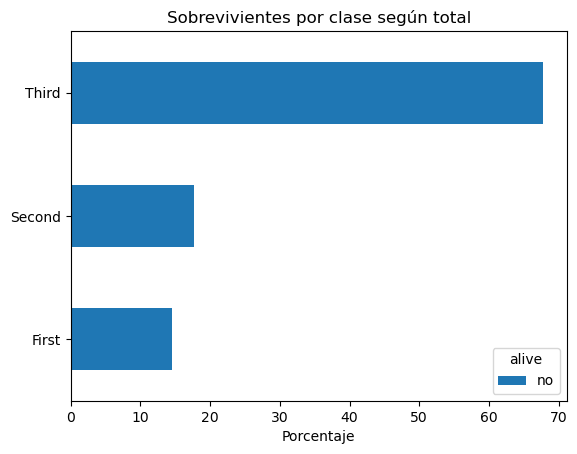

In [35]:
data.apply(lambda x: x/len(df_titanic.loc[mask]) * 100).plot(
		kind="barh",
		title="Sobrevivientes por clase según total",
		xlabel="Porcentaje",
		ylabel="")

En terminos relativos, ***más del 60% de los pasajeros fallecidos** son de tercera clase*.

Para determinar sí existe una relación estadísticamente significativa entre la clase a la que pertenecía el pasajero y si ha sobrevivido o no volveremos a utilizar la ***Prueba $\chi^2$ de Pearson***.

In [36]:
contingency_table = pd.crosstab(df_titanic["alive"], df_titanic["class"])
print("Tabla de contingencia")
print("-"*30)
contingency_table

Tabla de contingencia
------------------------------


class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [37]:
result = scipy.stats.chi2_contingency(contingency_table)
print("Valor de Chi-Cuadrado:", result.statistic)
print("Valor de pvalue:", result.pvalue)
print("Grados de libertad:", result.dof)
print("Frecuencias esperadas:\n", result.expected_freq)

Valor de Chi-Cuadrado: 102.88898875696056
Valor de pvalue: 4.549251711298793e-23
Grados de libertad: 2
Frecuencias esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


> **Interpretación de la Prueba $\chi^2$**
>
> Nuestro valor de $p$ es de $4.549251711298793e-23$ y, asumiendo un $\alpha=0,05$ y dos *grados de libertad*, podemos decir que la relación entre las dos variables categóricas existe y es estadísticamente significativa.

**3. ¿De qué ciudad sobrevivieron más personas? ¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?**

In [38]:
data = df_titanic.groupby(["embark_town", "alive"]).size().unstack()
data.head()

alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


<Axes: title={'center': 'Sobrevivientes según Ciudad de embarque'}, xlabel='Cant. de Pasajeros'>

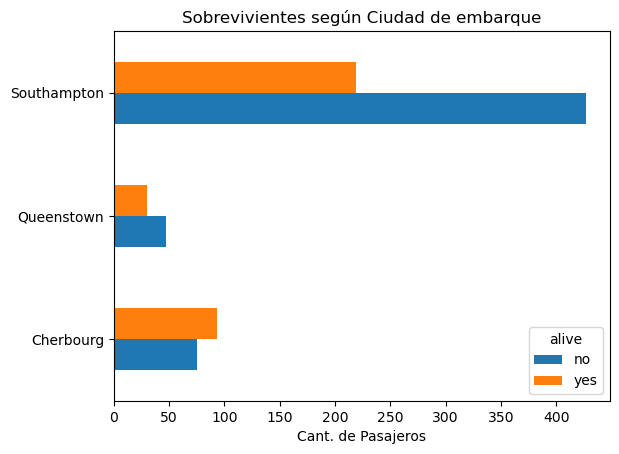

In [39]:
data.sort_values("embark_town", axis=0).plot(
		kind="barh",
		title="Sobrevivientes según Ciudad de embarque",
		xlabel="Cant. de Pasajeros",
		ylabel="")

Como se puede observar, han sobrevivido y fallecidos más pasajeros que han embarcado en `Southampton, England`. Debemos tener presente que la mayor cantidad de pasajeros han embarcado desde dicha ciudad.

In [40]:
data.columns

Index(['no', 'yes'], dtype='object', name='alive')

<Axes: title={'center': 'Fallecidos según Ciudad de embarque'}, xlabel='Porcentaje'>

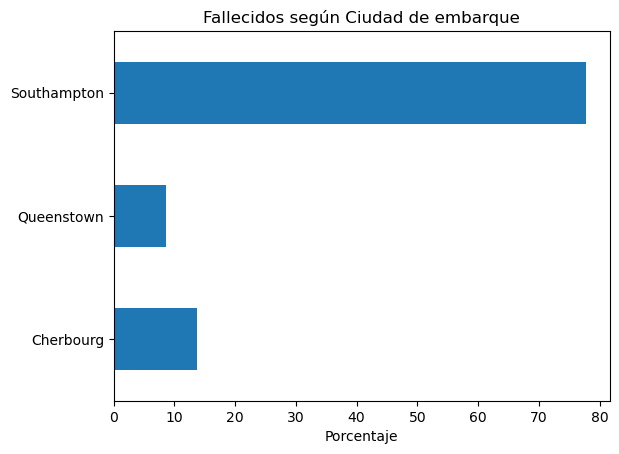

In [41]:
data["no"].apply(lambda x: x/data["no"].sum() * 100).plot(
		kind="barh",
		title="Fallecidos según Ciudad de embarque",
		xlabel="Porcentaje",
		ylabel="")

Más del 75% de fallecidos son de `Southampton, England`.

<Axes: title={'center': 'Sobrevivientes según Ciudad de embarque'}, xlabel='Porcentaje'>

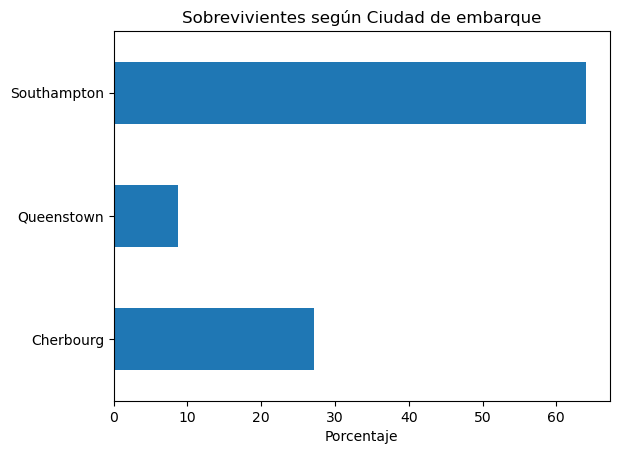

In [42]:
data["yes"].apply(lambda x: x/data["yes"].sum() * 100).plot(
		kind="barh",
		title="Sobrevivientes según Ciudad de embarque",
		xlabel="Porcentaje",
		ylabel="")

Casi el 65% de sobrevivientes son de `Southampton, England` y un 27% son de `Cherbourg, France`.

<Axes: title={'center': 'Pasajeros según Ciudad de embarque'}, xlabel='Porcentaje'>

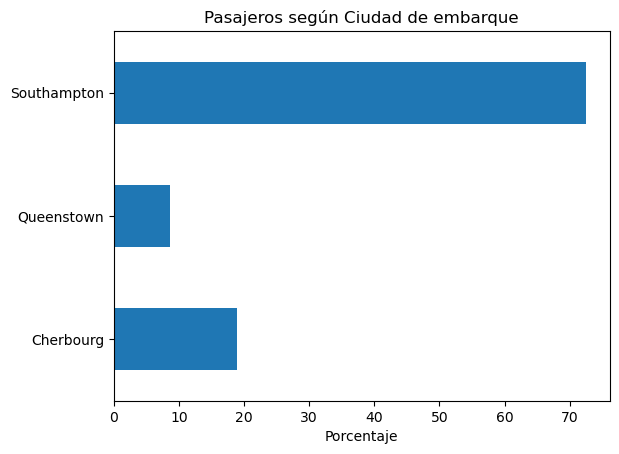

In [806]:
data = df_titanic.groupby(["embark_town"]).size()
data.apply(lambda x: x/len(df_titanic) * 100).plot(
		kind="barh",
		title="Pasajeros según Ciudad de embarque",
		xlabel="Porcentaje",
		ylabel="")

Si analizamos los pasajeros según `ciudad de embarque` podemos observar que más del 70% de los pasajeros han partido desde `Southampton, England`.

Para determinar sí existe una relación estadísticamente significativa entre la `embark_town` y `alive` vamos a utilizar la ***Prueba $\chi^2$ de Pearson***.

In [44]:
contingency_table = pd.crosstab(df_titanic["embark_town"],
								df_titanic["alive"])
print("Tabla de contingencia")
print("-"*30)
contingency_table

Tabla de contingencia
------------------------------


alive,no,yes
embark_town,,
Cherbourg,75,93
Queenstown,47,30
Southampton,427,219


In [45]:
result = scipy.stats.chi2_contingency(contingency_table)
print("Valor de Chi-Cuadrado:", result.statistic)
print("Valor de pvalue:", result.pvalue)
print("Grados de libertad:", result.dof)
print("Frecuencias esperadas:\n", result.expected_freq)

Valor de Chi-Cuadrado: 25.964452881874784
Valor de pvalue: 2.3008626481449577e-06
Grados de libertad: 2
Frecuencias esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


> **Interpretación de la Prueba $\chi^2$**
>
> Nuestro valor de $p$ es de $2.3008626481449577e-06$ y, asumiendo un $\alpha=0,05$ y dos *grados de libertad*, podemos decir que la relación entre las dos variables categóricas existe y es estadísticamente significativa.

__4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?__

Análisis de la distribución de `fare`.

alive
no     Axes(0.125,0.11;0.775x0.77)
yes    Axes(0.125,0.11;0.775x0.77)
Name: fare, dtype: object

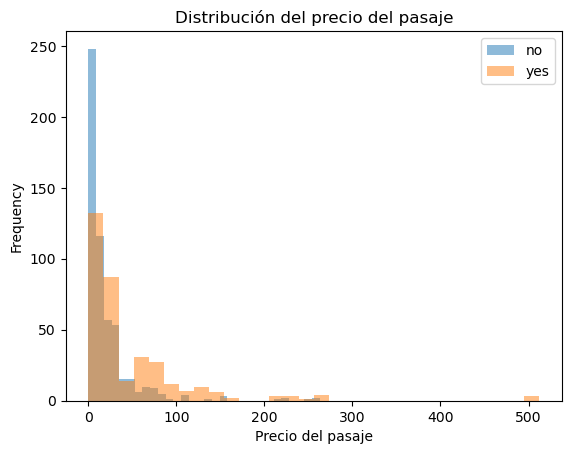

In [807]:
data = df_titanic[["fare", "alive"]]

plot_title = "Distribución del precio del pasaje"
data.groupby(["alive"])["fare"].plot(kind="hist",
									 alpha=0.5,
									 bins=30,
									 legend=True,
									 title=plot_title,
									 xlabel="Precio del pasaje")

fare    Axes(0.125,0.11;0.775x0.77)
dtype: object

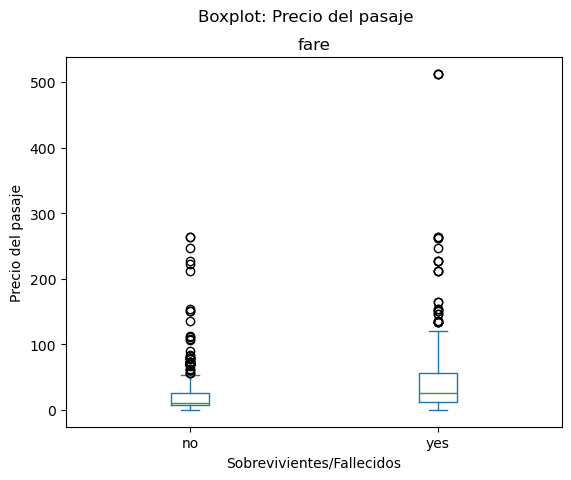

In [174]:
plot_title = "Boxplot: Precio del pasaje"
data.plot(kind="box",
		  by="alive",
		  title=plot_title,
		  xlabel="Sobrevivientes/Fallecidos",
		  ylabel="Precio del pasaje")

In [ ]:
data.groupby(["alive"]).describe()

fare                                                          
       count       mean        std  min      25%   50%   75%       max
alive                                                                 
no     549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
yes    342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292

Como se puede observar, hay una gran presencia de `outliers`.

Calculamos el *IQR*, el *minimum* y el *maximum* de `fare` para limpiar la columna de outliers.

In [810]:
iqr = data["fare"].quantile(0.75) - data["fare"].quantile(0.5)
minimum = max(data["fare"].quantile(0.25) - iqr * 1.5, 0)
maximum = data["fare"].quantile(0.75) + iqr * 1.5

is_below_minimum = data["fare"] < minimum
is_above_maximum = data["fare"] > maximum
mask = ~is_below_minimum & ~is_above_maximum

alive
no     Axes(0.125,0.11;0.775x0.77)
yes    Axes(0.125,0.11;0.775x0.77)
Name: fare, dtype: object

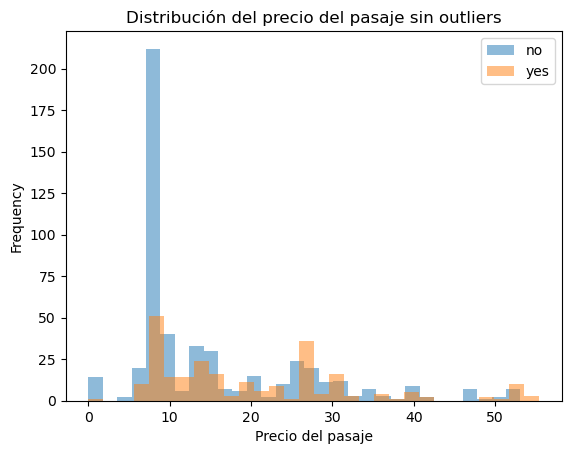

In [811]:
plot_title = "Distribución del precio del pasaje sin outliers"
data.loc[mask,:].groupby(["alive"])["fare"].plot(
		kind="hist",
		alpha=0.5,
		bins=30,
		legend=True,
		title=plot_title,
		xlabel="Precio del pasaje")

fare    Axes(0.125,0.11;0.775x0.77)
dtype: object

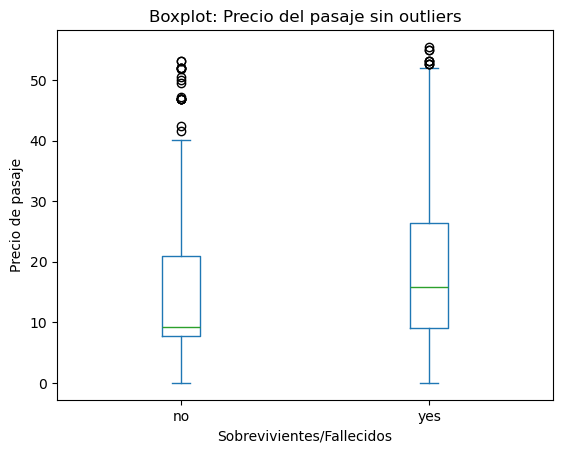

In [812]:
plot_title="Boxplot: Precio del pasaje sin outliers",
data.loc[mask, :].plot(kind="box",
					   by="alive",
					   title=plot_title,
					   xlabel="Sobrevivientes/Fallecidos",
					   ylabel="Precio de pasaje")

In [814]:
data.loc[mask,:].groupby(["alive"]).describe()

fare                                                              
       count       mean        std  min      25%     50%      75%      max
alive                                                                     
no     506.0  15.028103  11.136333  0.0  7.79580   9.225  21.0000  53.1000
yes    247.0  19.917090  12.482733  0.0  9.01665  15.850  26.3375  55.4417

Analizando las distribuciones del precio podemos observar que la `mediana` en las dos distribuciónes difieren.
- La `mediana` de fallecidos se encuentra a un valor cercano de 10 £.
- La `mediana` de sobrevivientes se encuentra a un valor cercano a 15 £.

Otro que debemos tener en cuenta es la `desviación estandar`. Existe menos variabilidad en los precios de los fallecidos respecto a los sobrevivientes, lo que nos lleva a pensar que la concentración de los precios se encuentra en valores más bajos u económicos.

Con estos datos, podemos inferir que la mayor parte de la tripulación que falleció pertenecía a la tercera clase, hecho que hemos analizado previamente con la prueba de $\chi^2$ entre `class` y `alive` y refuerza nuestro razonamiento.

Para determinar sí existe una relación estadísticamente significativa entre `fare` y `alive` vamos a utilizar la ***Prueba U de Mann-Whitney*** ya que estamos analizando una variable categórica binaria con una númerica.

In [185]:
from scipy.stats import mannwhitneyu

no_alive = data.groupby(["alive"])["fare"].groups["no"]
yes_alive = data.groupby(["alive"])["fare"].groups["yes"]

statistic, pvalue = mannwhitneyu(no_alive, yes_alive)
print("Prueba U de Mann-Whitney (con outliers)")
print("-"*50)
print("Valor estadístico:", statistic)
print("Valor de pvalue:", pvalue)

Prueba U de Mann-Whitney (con outliers)
--------------------------------------------------
Valor estadístico: 94437.0
Valor de pvalue: 0.8813727711495153


> **Interpretación de la Prueba U de Mann-Whitney (_con outliers_)**
>
> Nuestro valor de $p$ es de $0.8813727711495153$ y, asumiendo un $\alpha=0,05$, podemos decir que no existe una diferencia estadísticamente significativa en la distribución del precio del pasaje entre sobrevivientes y fallecidos.

In [186]:
no_alive = data.loc[mask,:].groupby(["alive"])["fare"].groups["no"]
yes_alive = data.loc[mask,:].groupby(["alive"])["fare"].groups["yes"]

statistic, pvalue = mannwhitneyu(no_alive, yes_alive)
print("Prueba U de Mann-Whitney (sin outliers)")
print("-"*50)
print("Valor estadístico:", statistic)
print("Valor de pvalue:", pvalue)

Prueba U de Mann-Whitney (sin outliers)
--------------------------------------------------
Valor estadístico: 63082.0
Valor de pvalue: 0.34737025390687404


> **Interpretación de la Prueba U de Mann-Whiney**
>
> Nuestro valor de $p$ es de $0.34737025390687404$. Asumiendo el mismo valor para $\alpha$, $\alpha=0,05$, continuamos sin encontrar evidencias de estádisticamente significativa.

__5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?__

In [191]:
mask = df_titanic["fare"] == 0
print("Total de Pasajeros que no abonaro el pasaje:",
	  len(df_titanic.loc[mask,:]))
df_titanic.loc[mask,:]

Total de Pasajeros que no abonaro el pasaje: 15


,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.0,0.0,Third,man,True,Southampton,no,True,0
263,male,40.0,0.0,First,man,True,Southampton,no,True,0
271,male,25.0,0.0,Third,man,True,Southampton,yes,True,0
277,male,30.0,0.0,Second,man,True,Southampton,no,True,0
302,male,19.0,0.0,Third,man,True,Southampton,no,True,0
413,male,30.0,0.0,Second,man,True,Southampton,no,True,0
466,male,30.0,0.0,Second,man,True,Southampton,no,True,0
481,male,30.0,0.0,Second,man,True,Southampton,no,True,0
597,male,49.0,0.0,Third,man,True,Southampton,no,True,0
633,male,30.0,0.0,First,man,True,Southampton,no,True,0


In [192]:
df_titanic.loc[mask, :].groupby(["class"]).count()

,sex,age,fare,who,adult_male,embark_town,alive,alone,family_members
class,,,,,,,,,
First,5,5,5,5,5,5,5,5,5
Second,6,6,6,6,6,6,6,6,6
Third,4,4,4,4,4,4,4,4,4


No tengo una explicación del porque no han abonado el pasaje. Me puedo imaginar a que pueden ser parte de la tripulación del barco o son pasajeros que, ha cambio de viajar, prestaban servicios en el barco en forma de compensación. También, hay que destacar el hecho de que solo uno de ellos ha sobrevivído en la tragedia.

Vamos a ver qué ocurrió con la persona que más dinero abonó el pasaje.

In [202]:
index = df_titanic["fare"].idxmax()
df_titanic.iloc[index]

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
Name: 258, dtype: object

Podemos ver que es una mujer de 35 años que subío al barco en Cherbourg, France. Por el pasaje abonó 512.32 £, viajaba sola y sobrevivió a la tragedia.

 __6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.__

In [246]:
data = df_titanic[["embark_town", "alive", "fare"]]
data.sample(2)

,embark_town,alive,fare
191,Southampton,no,13.0000
172,Southampton,yes,11.1333


Hacemos un `.describe()` para ver algúnos datos estádisticos.

**`alive`**

In [ ]:
groups = data.groupby(["alive"])[["embark_town", "fare"]]
groups.describe()

fare                                                          
       count       mean        std  min      25%   50%   75%       max
alive                                                                 
no     549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
yes    342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292

Sin tener en cuenta `embark_town`, podemos notar lo siguiente:
- Como vimos anteriormente, *más del 50% de los pasajeros han fallecido*.
- *La variabilidad de precio en los sobrevivientes es más del doble* en comparación de los fallecidos con menos de la mitad de pasajeros.
- El 75% de los sobrevivientes han pagado un pasaje de 57 £. Sí lo comparamos con los fallecidos, el percentil 75 ha pagado un pasaje de 26 £, que es menos de la mitad respecto a los sobrevivientes.

**`embark_town`**

In [ ]:
data.groupby(["embark_town"])["fare"].describe()

,count,mean,std,min,25%,50%,75%,max
embark_town,,,,,,,,
Cherbourg,168.0,59.954144,83.912994,4.0125,13.69795,29.70,78.500025,512.3292
Queenstown,77.0,13.276030,14.188047,6.7500,7.75000,7.75,15.500000,90.0000
Southampton,646.0,27.243651,35.952905,0.0000,8.05000,13.00,27.900000,263.0000


Sin tener en cuenta si el pasajero a fallecido o ha sobrevivido, podemos notar lo siguiente:
- La `mediana` de `Cherbourg, France` es más del doble de la suma de `Queenstown, Ireland` y `Southampton, England`. El percentil 75 también es igual en este sentido. Con estos dos datos, podemos decir que en`Cherbourg, France`, los pasajeros del Titanic han pagado un pasaje mucho más caro respecto a las otras dos ciudades.
- En `Southampton, England` han subido 646 pasajeros de los 891. Como vimos anteriormente, es más del 70% de los pasajeros. La `mediana` del precio del pasaje es 13 £ y el percentil 75 es 27.9 £.
- En `Queenstown, Ireland`, el percentil 75 del precio de la tarifa es de 15.5 £. Esto nos dice, que la mayoría ha pagado el pasaje más económico respecto a las otras ciudades.

Si tomamos en cuenta estos datos en un `.describe()`.

In [ ]:
aggregates = [
	"count",
	"mean",
	"std",
	("25%", lambda x: x.quantile(0.25)),
	("50%", lambda x: x.quantile(0.50)),
	("75%", lambda x: x.quantile(0.75)),
	"min",
	"max"
]
data.groupby(["alive", "embark_town"])["fare"].agg(aggregates)

count       mean        std      25%       50%      75%  \
alive embark_town                                                            
no    Cherbourg       75  35.443335  49.617218   7.2292  14.45830  32.6750   
      Queenstown      47  13.335904  13.550636   7.7500   7.75000  15.5000   
      Southampton    427  20.743987  27.896824   7.8958  10.50000  26.0000   
yes   Cherbourg       93  79.720926  99.582717  19.2583  56.92920  89.1042   
      Queenstown      30  13.182227  15.371167   7.7500   7.80835  12.3500   
      Southampton    219  39.916514  45.383008  12.8250  26.00000  52.2771   

                      min       max  
alive embark_town                    
no    Cherbourg    4.0125  247.5208  
      Queenstown   6.7500   90.0000  
      Southampton  0.0000  263.0000  
yes   Cherbourg    7.2250  512.3292  
      Queenstown   7.7333   90.0000  
      Southampton  0.0000  263.0000

Podemos interpretar lo siguiente:
- En `Southampton` han sobrevivido y fallecido la mayoría de los pasajeros. Lo cuál va en concordancia con lo analizado previamente. El 70% de los pasajeros a bordo del Titanic salieron de `Southampton, England`.
- La variabilidad de los datos, la media, la mediana, la desviación estandar, el percentil 25 y 75 de la tarifa es mucho mayor en los sobreviviente respecto a los fallecidos; normalmente es más del doble. Esto nos dice que los que han fallecido, independientemente de la ciudad de embarque, ha pagado un precio más bajo en el pasaje.
	- **Aclaración**: en `Queenstown, Ireland`, los datos son más constantes, con muy poca o nula variación, independientemente si ha sobrevivido o fallecido.

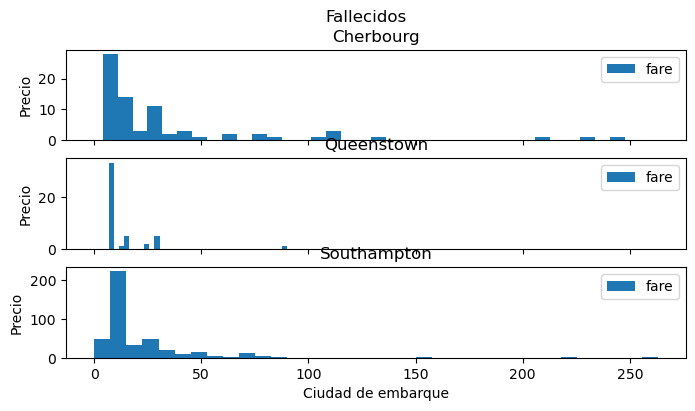

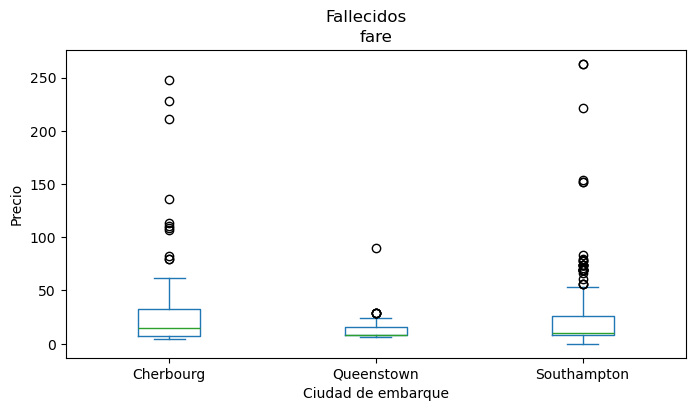

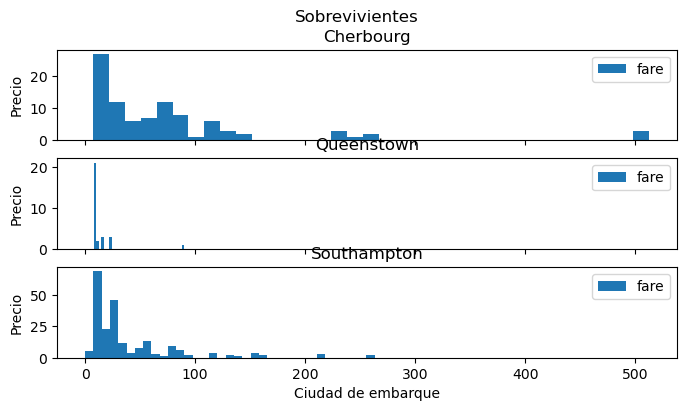

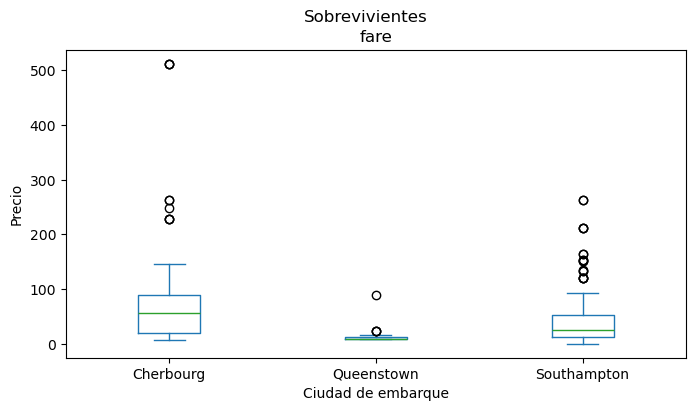

In [348]:
for key, group in groups:
	plot_title = "Sobrevivientes" if key[0] == "yes" else "Fallecidos"
	group.plot(kind="hist",
			   bins=35,
			   by="embark_town",
			   figsize=(8,4),
			   title=plot_title,
			   sharex=True,
			   xlabel="Ciudad de embarque",
			   ylabel="Precio")

	group.plot(kind="box",
			   by="embark_town",
			   figsize=(8,4),
			   title=plot_title,
			   sharex=True,
			   xlabel="Ciudad de embarque",
			   ylabel="Precio")


__7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?__

In [877]:
columns = ["class", "alive", "age"]
data = df_titanic[columns]
data.sample(2)

,class,alive,age
640,Third,no,20.0
676,Third,no,24.5


Hacemos una categorización de la edad para realizar un análisis más cualitativo.

In [831]:
def age_groups(x):
	if x <= 12:
		return "child"
	elif x <= 17:
		return "adolescent"
	elif x <= 29:
		return "young adult"
	elif x <= 39:
		return "early adult"
	elif x <= 59:
		return "middle-aged adult"
	else:
		return "senior"

In [878]:
data["age_group"] = data["age"].apply(age_groups)
data.sample(4)

,class,alive,age,age_group
164,Third,no,1.00,child
574,Third,no,16.00,adolescent
831,Second,yes,0.83,child
462,First,no,47.00,middle-aged adult


**Sobrevivientes**: Valores Absolutos

In [879]:
mask = data["alive"] == "yes"
column = ["class", "age_group"]
survived = data.loc[mask, column].groupby(["class", "age_group"])

<Axes: title={'center': 'Sobrevivientes: Grupos etario según tipología del pasaje'}, xlabel='Clase', ylabel='Pasajeros'>

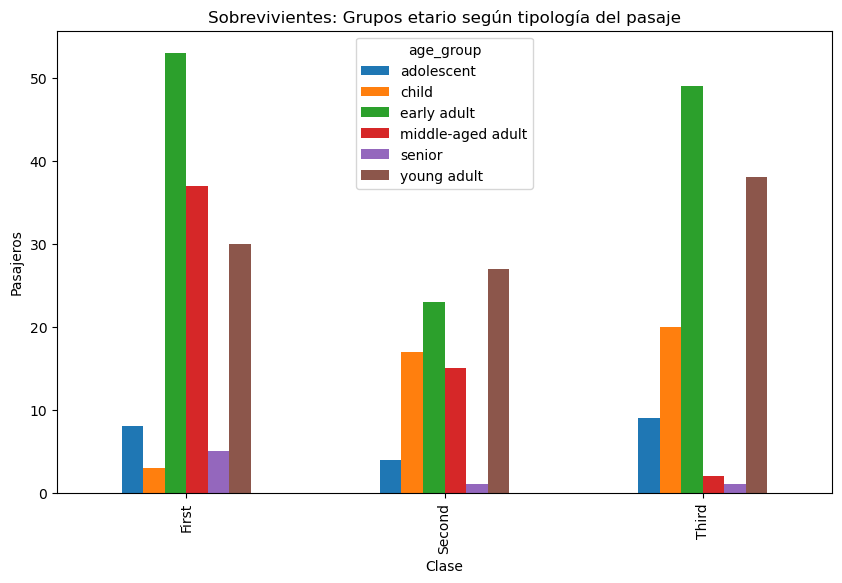

In [880]:
absolute = survived.value_counts().unstack()
plot_title = "Sobrevivientes: Grupos etario según tipología del pasaje"
absolute.plot(kind="bar",
			  figsize=(10,6),
			  title=plot_title,
			  xlabel="Clase",
			  ylabel="Pasajeros")

**Sobrevivientes**: Valores Relativos

In [ ]:
size_by_class = survived.value_counts().unstack(level=0).sum()
relative = absolute.apply(lambda x: x/size_by_class[x.index], axis=0)
relative

age_group,adolescent,child,early adult,middle-aged adult,senior,young adult
class,,,,,,
First,0.058824,0.022059,0.389706,0.272059,0.036765,0.220588
Second,0.045977,0.195402,0.264368,0.172414,0.011494,0.310345
Third,0.075630,0.168067,0.411765,0.016807,0.008403,0.319328


<Axes: title={'center': 'Sobrevivientes: Grupos etario según tipología del pasaje'}, xlabel='Clase', ylabel='% Pasajeros'>

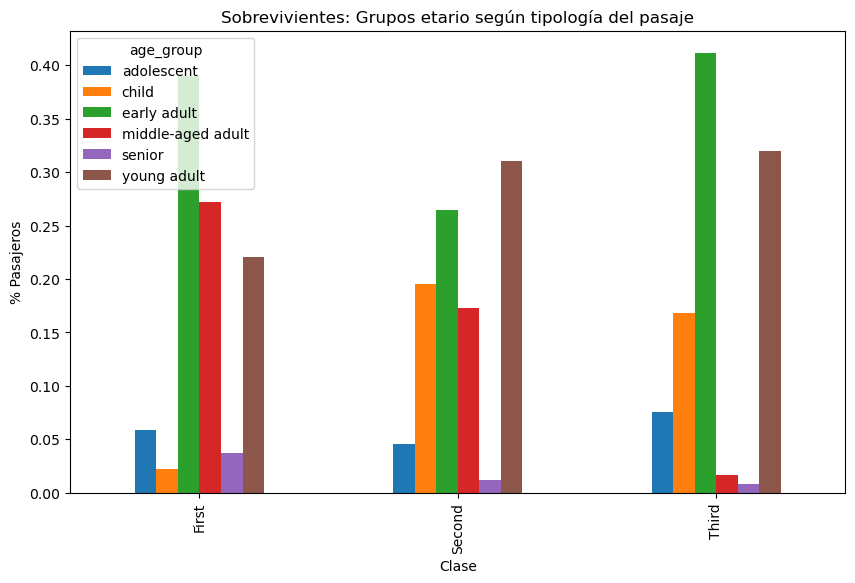

In [889]:
plot_title = "Sobrevivientes: Grupos etario según tipología del pasaje"
relative.plot(kind="bar",
			  figsize=(10,6),
			  title=plot_title,
			  xlabel="Clase",
			  ylabel="% Pasajeros")

**Fallecidos**: Valores Absolutos

In [892]:
mask = data["alive"] == "no"
column = ["class", "age_group"]
deceaseds = data.loc[mask, column].groupby(["class", "age_group"])

<Axes: title={'center': 'Fallecidos: Grupos etario según tipología del pasaje'}, xlabel='Clase', ylabel='Pasajeros'>

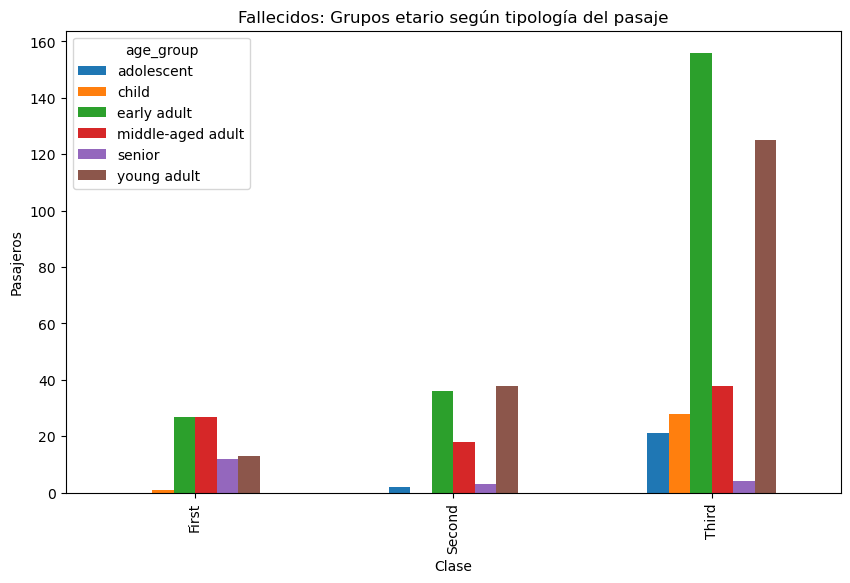

In [893]:
absolute = deceaseds.value_counts().unstack()
plot_title = "Fallecidos: Grupos etario según tipología del pasaje"
absolute.plot(kind="bar",
			  figsize=(10,6),
			  title=plot_title,
			  xlabel="Clase",
			  ylabel="Pasajeros")

**Fallecidos**: Valores Relativos

In [895]:
size_by_class = deceaseds.value_counts().unstack(level=0).sum()
relative = absolute.apply(lambda x: x/size_by_class[x.index], axis=0).fillna(0)
relative

age_group,adolescent,child,early adult,middle-aged adult,senior,young adult
class,,,,,,
First,0.000000,0.012500,0.337500,0.337500,0.150000,0.162500
Second,0.020619,0.000000,0.371134,0.185567,0.030928,0.391753
Third,0.056452,0.075269,0.419355,0.102151,0.010753,0.336022


<Axes: title={'center': 'Fallecidos: Grupos etario según tipología del pasaje'}, xlabel='Clase', ylabel='% Pasajeros'>

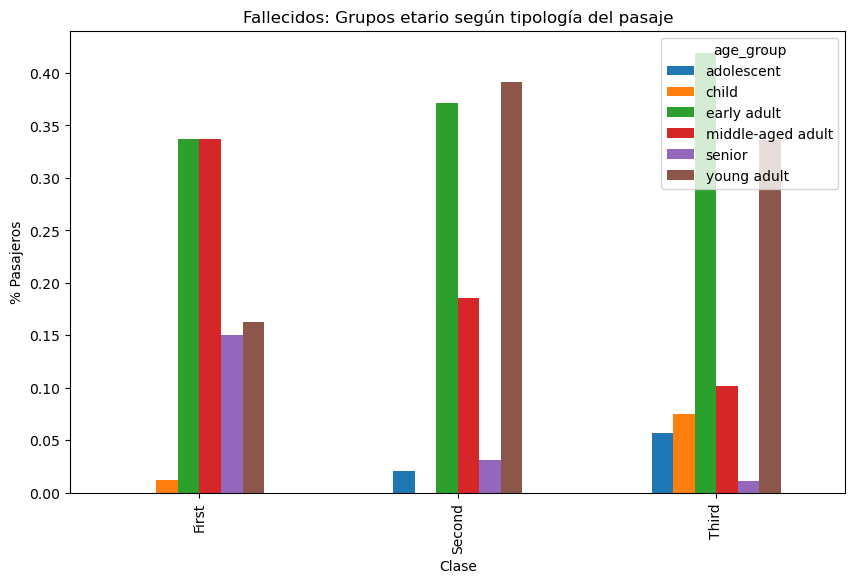

In [897]:
plot_title = "Fallecidos: Grupos etario según tipología del pasaje"
relative.plot(kind="bar",
			  figsize=(10,6),
			  title=plot_title,
			  xlabel="Clase",
			  ylabel="% Pasajeros")

__8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?__

In [817]:
columns = ["alive", "age", "fare"]
data = df_titanic[columns]
data.sample(2)

,alive,age,fare
856,yes,45.0,164.8667
698,no,49.0,110.8833


In [818]:
data["age_group"] = data["age"].apply(age_groups)
data.sample(2)

,alive,age,fare,age_group
98,yes,34.0,23.0,early adult
134,no,25.0,13.0,young adult


Análisis de `age`, utilizando `.describe()`, según sí sobrevivió/falleció.

In [819]:
data.groupby(["alive"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
alive,,,,,,,,
no,549.0,30.483607,12.454065,1.00,23.0,30.0,35.0,74.0
yes,342.0,28.595526,13.776751,0.42,21.0,30.0,35.0,80.0


Este resumen nos muestra que no hay mucha variación en la edad entre los fallecidos y los sobrevivientes. Lo único que destaca es que ningúna persona que no haya llegado al año de vida ha fallecido.

Analizamos nuevamente sobre nuestros grupos etarios calculados.

In [ ]:
data.groupby(["alive", "age_group"])["fare"].describe()

count       mean        std      min        25%  \
alive age_group                                                            
no    adolescent          23.0  17.749283  13.842932   7.0542   7.952100   
      child               29.0  34.255890  24.227874  10.4625  27.900000   
      early adult        219.0  18.614381  26.844784   0.0000   7.750000   
      middle-aged adult   83.0  27.041064  26.069843   0.0000   8.050000   
      senior              19.0  40.403732  56.915975   6.2375  10.500000   
      young adult        176.0  20.752482  36.411633   0.0000   7.854200   
yes   adolescent          21.0  44.938495  54.196252   7.2250   8.029200   
      child               40.0  29.564688  28.046978   8.5167  15.860425   
      early adult        125.0  52.708199  82.990287   7.2250  13.000000   
      middle-aged adult   54.0  63.677706  58.892319   7.9250  25.946900   
      senior               7.0  51.785114  33.523581   9.5875  20.250000   
      young adult         95.0  42.477018  60.633846   0.0000   8.050000   

                              50%       75%       max  
alive age_group                                        
no    adolescent          9.50000  23.12500   46.9000  
      child              29.12500  34.37500  151.5500  
      early adult         8.05000  22.56460  227.5250  
      middle-aged adult  15.00000  30.59790  113.2750  
      senior             26.55000  36.82710  263.0000  
      young adult         8.75625  14.45420  263.0000  
yes   adolescent         14.45420  57.97920  211.3375  
      child              21.30000  31.38750  151.5500  
      early adult        26.00000  57.00000  512.3292  
      middle-aged adult  39.30000  78.26670  247.5208  
      senior             75.25000  78.57915   80.0000  
      young adult        18.75000  51.30210  263.0000

La mayor cantidad de personas que han fallecido se encuentran entre los 20 y los 60 años. Lo mismo sucede con los sobrevivientes. También podemos observar que, normalmente, los que han fallecido pagaron una tarifa más económica que los sobrevivientes, con la excepción del grupo etario `child`. Esto se condice con lo que venímos analizando a lo largo del notebook.

array([<Axes: title={'center': 'adolescent'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'child'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'early adult'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'middle-aged adult'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'senior'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'young adult'}, xlabel='Tarifa'>],
      dtype=object)

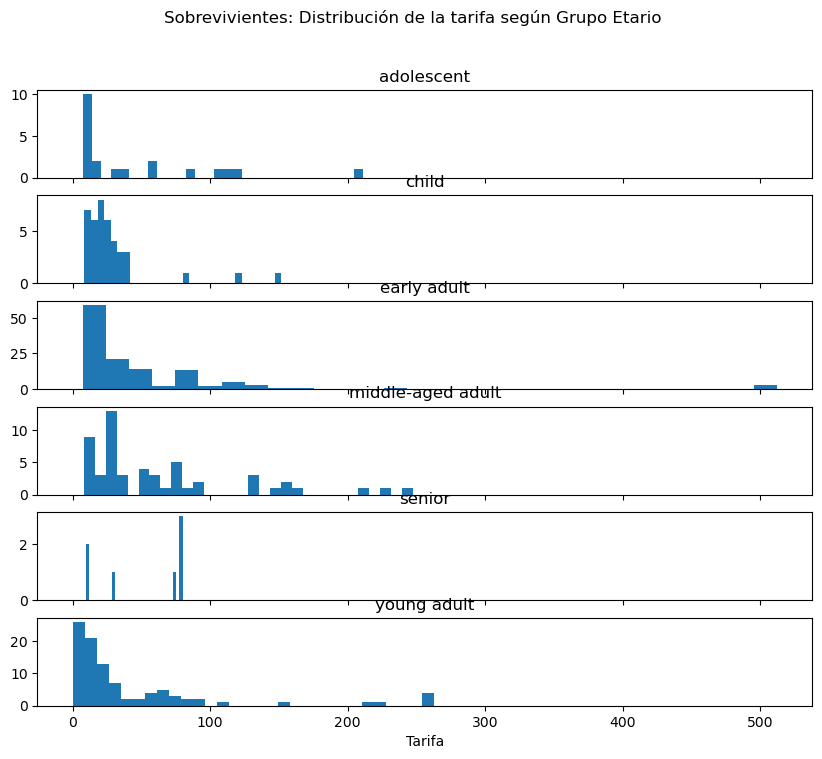

In [ ]:
mask = data["alive"] == "yes"
plot_title = "Sobrevivientes: Distribución de la tarifa según Grupo Etario"
data.loc[mask, ["age_group", "fare"]].plot(by="age_group",
										   bins=30,
										   figsize=(10,8),
										   kind="hist",
										   title=plot_title,
										   legend=False,
										   xlabel="Tarifa",
										   sharex=True,
										   ylabel="")

array([<Axes: title={'center': 'adolescent'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'child'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'early adult'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'middle-aged adult'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'senior'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'young adult'}, xlabel='Tarifa'>],
      dtype=object)

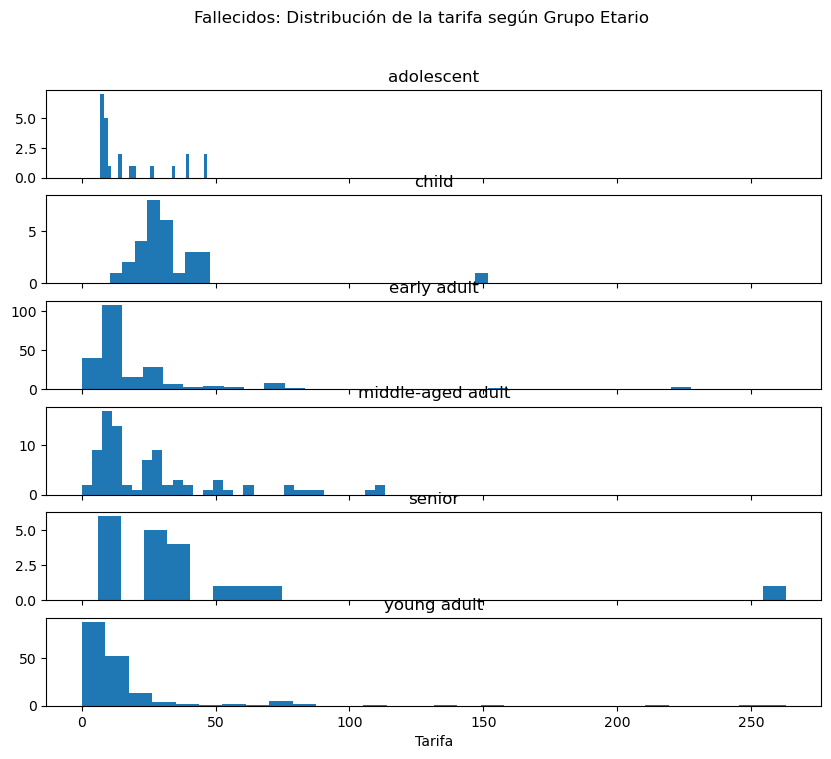

In [794]:
mask = data["alive"] == "no"
plot_title = "Fallecidos: Distribución de la tarifa según Grupo Etario"
data.loc[mask, ["age_group", "fare"]].plot(by="age_group",
										   bins=30,
										   figsize=(10,8),
										   kind="hist",
										   title=plot_title,
										   legend=False,
										   xlabel="Tarifa",
										   sharex=True,
										   ylabel="")

Las gráficas confirman lo que hemos estado análizando. Los fallecidos han pagado un precio mucho menor por el pasaje que los sobrevivientes. 

El grupo etario `child` es la excepción.

In [820]:
is_below_minimum = data["fare"] < minimum
is_above_maximum = data["fare"] > maximum
filter_outliers = ~is_below_minimum & ~is_above_maximum

In [ ]:
data.loc[filter_outliers, :].groupby(["alive", "age_group"])["fare"].describe()

count       mean        std      min       25%  \
alive age_group                                                           
no    adolescent          23.0  17.749283  13.842932   7.0542   7.95210   
      child               28.0  30.066814   8.998877  10.4625  26.96250   
      early adult        206.0  13.485859  10.439479   0.0000   7.75000   
      middle-aged adult   72.0  18.413310  12.595772   0.0000   8.05000   
      senior              16.0  23.230731  13.267468   6.2375   9.81875   
      young adult        161.0  11.668191   7.611081   0.0000   7.79580   
yes   adolescent          14.0  13.650600   9.743136   7.2250   7.79375   
      child               37.0  22.410249   9.115342   8.5167  15.74170   
      early adult         87.0  19.524091  12.829514   7.2250   7.92500   
      middle-aged adult   32.0  26.194666  13.047043   7.9250  15.18750   
      senior               3.0  16.695833  11.530776   9.5875  10.04375   
      young adult         74.0  17.734066  12.805106   0.0000   7.88335   

                            50%        75%      max  
alive age_group                                      
no    adolescent          9.500  23.125000  46.9000  
      child              29.125  32.134375  46.9000  
      early adult         8.050  15.775000  53.1000  
      middle-aged adult  13.750  26.662500  52.0000  
      senior             26.550  32.615600  49.5042  
      young adult         8.050  13.000000  53.1000  
yes   adolescent          9.275  13.840650  39.4000  
      child              20.525  27.750000  41.5792  
      early adult        15.500  26.287500  55.0000  
      middle-aged adult  26.125  30.625000  52.5542  
      senior             10.500  20.250000  30.0000  
      young adult        13.000  26.000000  55.4417

array([<Axes: title={'center': 'adolescent'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'child'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'early adult'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'middle-aged adult'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'senior'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'young adult'}, xlabel='Tarifa'>],
      dtype=object)

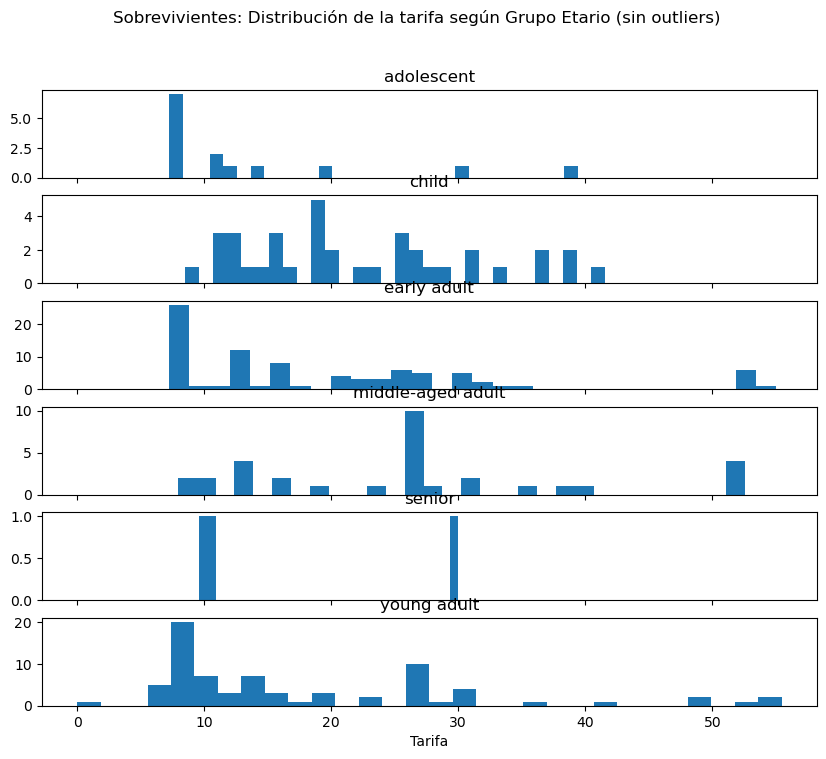

In [823]:
mask = data["alive"] == "yes"
plot_title = "Sobrevivientes: Distribución de la tarifa según Grupo Etario (sin outliers)"
data.loc[mask & filter_outliers, ["age_group", "fare"]].plot(by="age_group",
										   bins=30,
										   figsize=(10,8),
										   kind="hist",
										   title=plot_title,
										   legend=False,
										   xlabel="Tarifa",
										   sharex=True,
										   ylabel="")

fare    Axes(0.125,0.11;0.775x0.77)
dtype: object

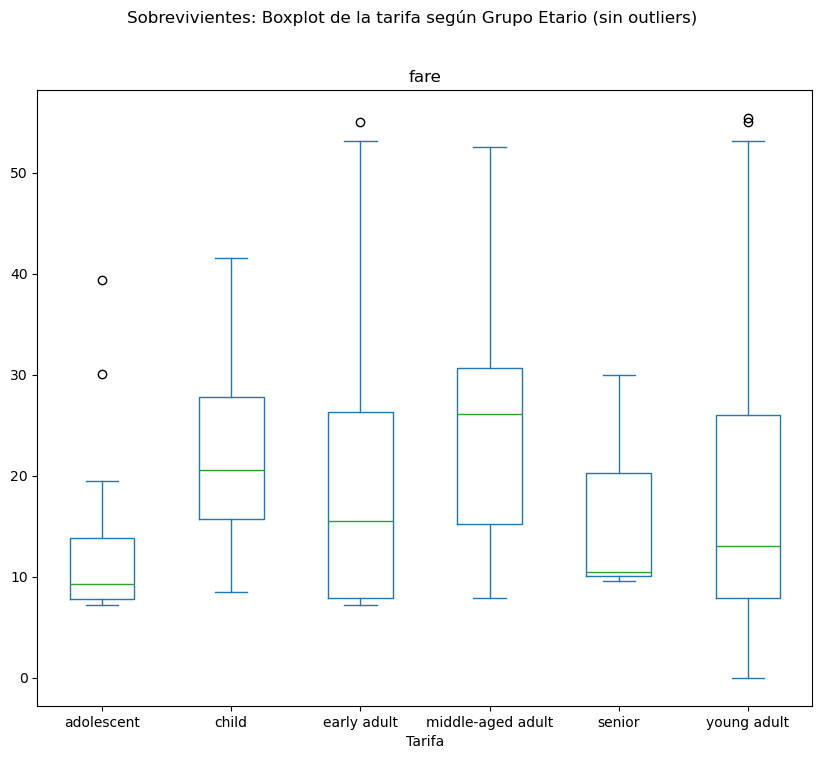

In [ ]:
mask = data["alive"] == "yes"
plot_title = "Sobrevivientes: Boxplot de la tarifa según Grupo Etario (sin outliers)"
data.loc[mask & filter_outliers, ["age_group", "fare"]].plot(
		by="age_group",
		figsize=(10,8),
		kind="box",
		title=plot_title,
		legend=False,
		xlabel="Tarifa",
		sharex=True,
		ylabel="")

array([<Axes: title={'center': 'adolescent'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'child'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'early adult'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'middle-aged adult'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'senior'}, xlabel='Tarifa'>,
       <Axes: title={'center': 'young adult'}, xlabel='Tarifa'>],
      dtype=object)

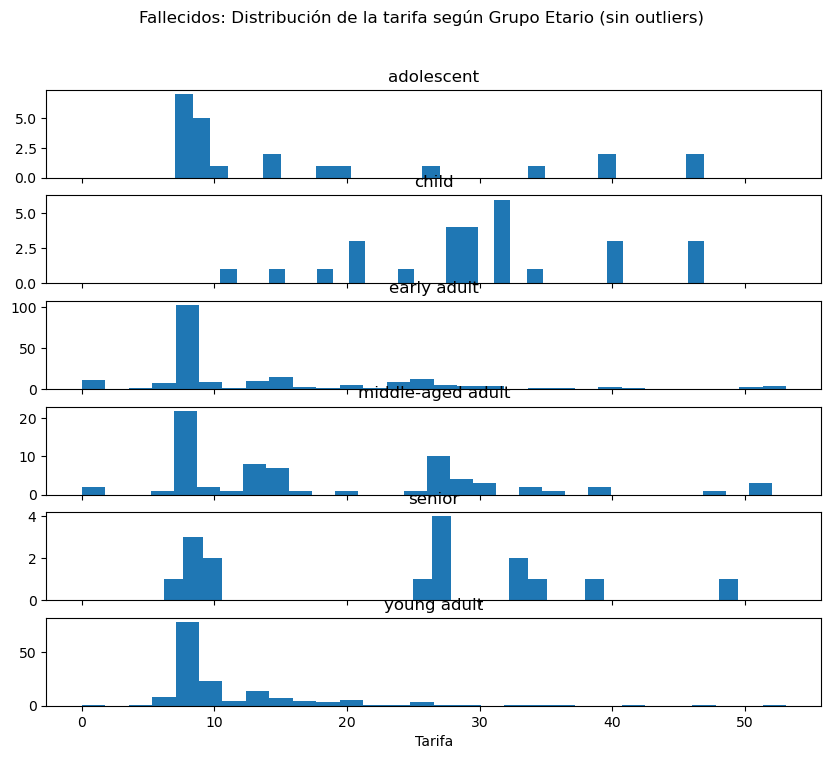

In [ ]:
mask = data["alive"] == "no"
plot_title = "Fallecidos: Distribución de la tarifa según Grupo Etario (sin outliers)"
data.loc[mask & filter_outliers, ["age_group", "fare"]].plot(
		by="age_group",
		bins=30,
		figsize=(10,8),
		kind="hist",
		title=plot_title,
		legend=False,
		xlabel="Tarifa",
		sharex=True,
		ylabel="")

fare    Axes(0.125,0.11;0.775x0.77)
dtype: object

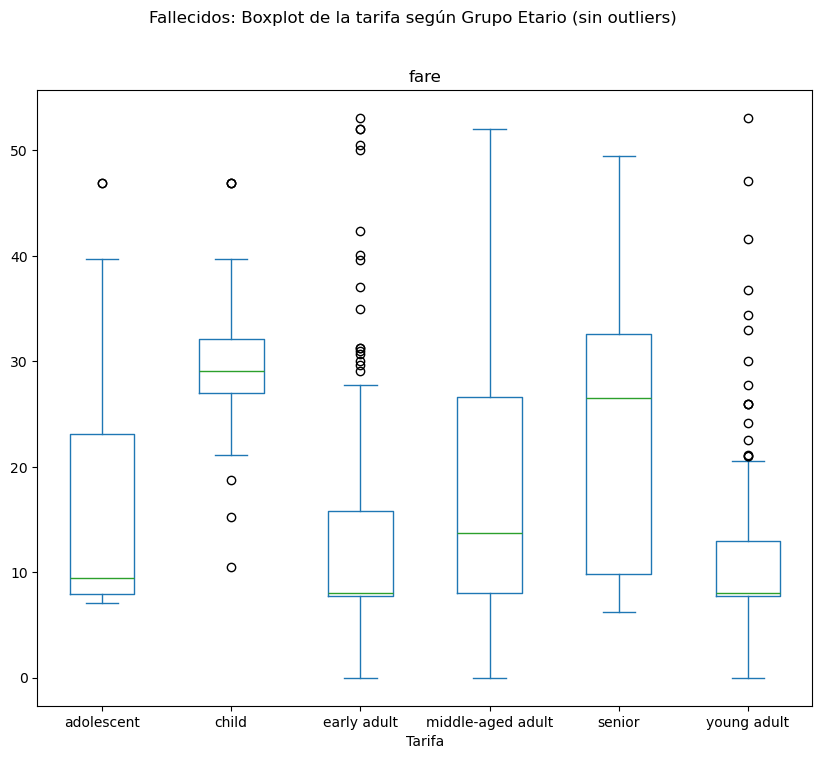

In [829]:
mask = data["alive"] == "no"
plot_title = "Fallecidos: Boxplot de la tarifa según Grupo Etario (sin outliers)"
data.loc[mask & filter_outliers, ["age_group", "fare"]].plot(
		by="age_group",
		figsize=(10,8),
		kind="box",
		title=plot_title,
		legend=False,
		xlabel="Tarifa",
		sharex=True,
		ylabel="")

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?